# Bitcoin Historical Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BTC-2021min.csv')
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [4]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
610781,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [5]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [7]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.set_index('date', inplace=True)
df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01 03:43:00,1646106180,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
2022-03-01 03:41:00,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...
2021-01-01 00:05:00,1609459500,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
2021-01-01 00:04:00,1609459440,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
2021-01-01 00:03:00,1609459380,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387


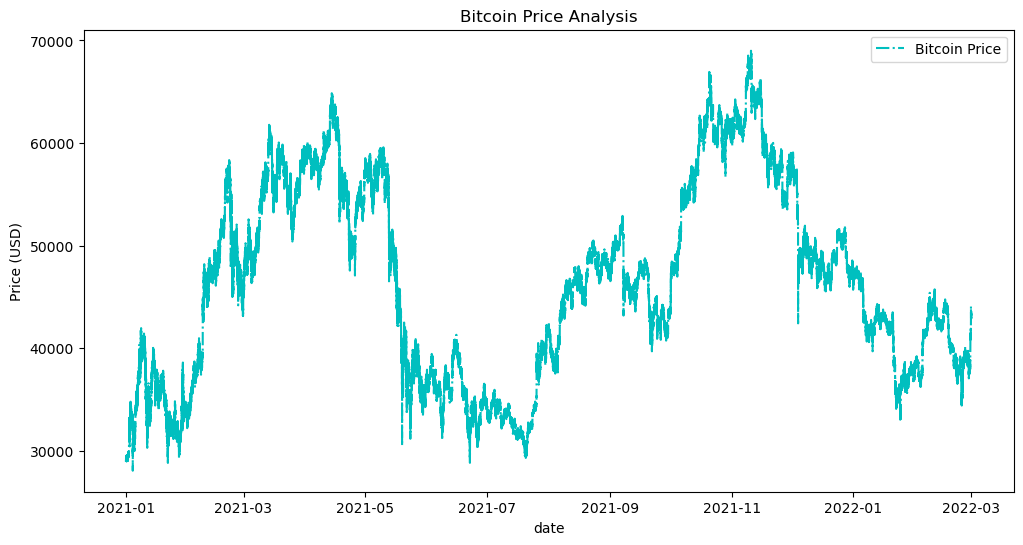

In [10]:
# Line plot of Bitcoin's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Bitcoin Price', color='c', linestyle='-.')
plt.xlabel('date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Analysis')
plt.legend()
plt.show()

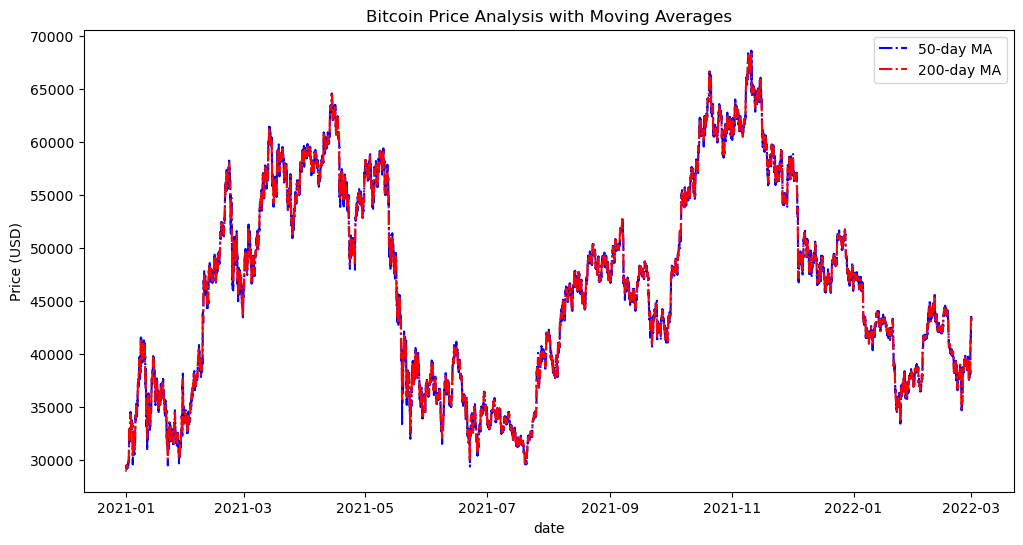

In [11]:
# Calculate 50-day and 200-day moving averages
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

# Plot Bitcoin price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MA_50'], label='50-day MA', color='b', linestyle='-.')
plt.plot(df.index, df['MA_200'], label='200-day MA', color='r', linestyle='-.')
plt.xlabel('date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Analysis with Moving Averages')
plt.legend()
plt.show()

<Axes: xlabel='date'>

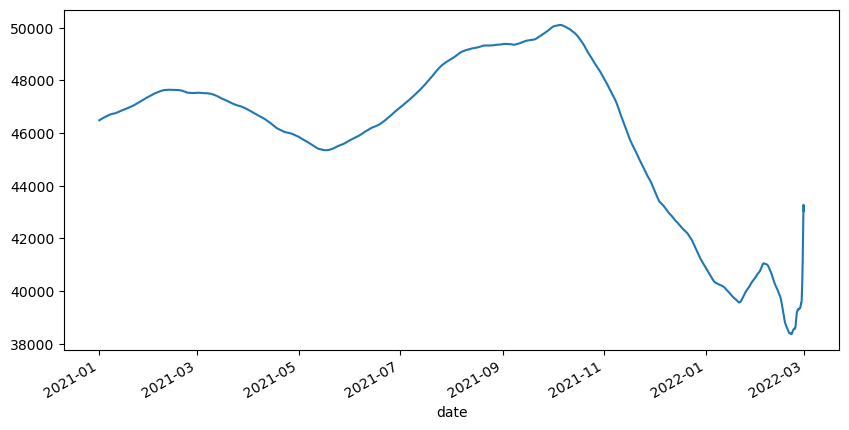

In [12]:
df['close'].expanding().mean().plot(figsize=(10,5))

### Extracting columns necessary for the Model

In [13]:
required = ['open', 'high', 'low', 'Volume BTC', 'Volume USD']
output = 'close'

In [14]:
required

['open', 'high', 'low', 'Volume BTC', 'Volume USD']

In [15]:
output

'close'

### Splitting the data to Train and Test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df[required],df[output],test_size = 0.3)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Checking the score of our model

In [18]:
model.score(x_test, y_test)

0.9999929652066948

### Prediction

In [19]:
future = df.shift(periods=30).tail(30)

In [20]:
prediction = model.predict(future[required])

In [21]:
prediction

array([29057.83925075, 29060.21827575, 29081.90435863, 29078.67495048,
       29033.22319217, 29036.02292046, 29024.50540795, 29044.84278009,
       29040.52761493, 29016.61608143, 29031.38295912, 29025.49381807,
       29036.87415751, 29037.63402722, 29000.67278444, 28989.44950714,
       29012.50102199, 28997.41233993, 28984.40879319, 28997.76176381,
       28989.92561604, 28965.25388335, 28984.42670772, 28994.7868004 ,
       28977.63814956, 28992.96328496, 28954.25518187, 28958.74337476,
       28944.81172344, 28950.78701562])

### Plotting a graph for better visualization

Text(0, 0.5, '$ Price')

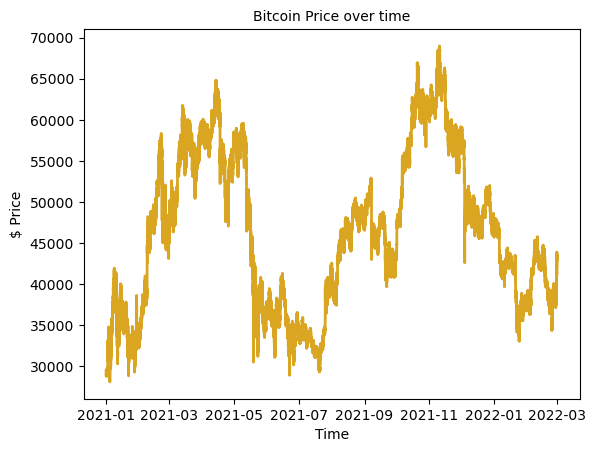

In [22]:
plt.plot(df['open'], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=10)
plt.xlabel("Time", size=10)
plt.ylabel("$ Price", size=10)

### Although we were successful to an extent, this wouldn't work in real world as cryptocurrencies are highly volatile and unpredictable. New factors could come into play anytime which could affect the price.